In [35]:
import torch 
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("Current CUDA device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))


CUDA available: True
CUDA device count: 1
Current CUDA device: 0
Device name: Quadro M2000M


In [36]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Read the CSV file
data = pd.read_csv('..\Data\Dataset_Electric_Motor.csv')

In [ ]:
import numpy as np
import pandas as pd

# Define the ranges and step sizes for x1, x2, and x3
step_x1_x2 = 10          # Step size for x1 and x2 in Amps
step_x3 = np.pi / 18     # Step size for x3 in radians

# Generate the bins for each variable
x1_bins = np.arange(-240, 0, step_x1_x2)
x2_bins = np.arange(0, 241, step_x1_x2)
x3_bins = np.arange(-np.pi, np.pi + step_x3, step_x3)

# Filter for rows where x4=2 and x5=3
data = data[(data['n_k'].astype(int)  == 2) & (data['n_1k'].astype(int)  == 3)]
print(f"Filtered data length: {len(data)}")

# Function to assign each value to a bin index
def assign_bin(value, bins):
    return np.digitize(value, bins) - 1  # Shift to 0-based indexing

# Apply the binning function to x1, x2, and x3 columns
data['class_id_k'] = data['id_k'].apply(lambda x: assign_bin(x, x1_bins))
data['class_iq_k'] = data['iq_k'].apply(lambda x: assign_bin(x, x2_bins))
data['class_epsilon_k'] = data['epsilon_k'].apply(lambda x: assign_bin(x, x3_bins))

# Combine the class indices to form a unique class ID for each combination of x1, x2, x3 bins
data['class_id'] = data['class_id_k'].astype(str) + '_' + \
                   data['class_iq_k'].astype(str) + '_' + \
                   data['class_epsilon_k'].astype(str)

# Filter classes with at least 60 samples
sufficient_samples = data['class_id'].value_counts()
valid_classes = sufficient_samples[sufficient_samples >= 60].index
print(f"Valid classes count: {len(valid_classes)}")
filtered_data = data[data['class_id'].isin(valid_classes)]
filtered_data.to_csv('../Data/sampled_data.csv', index=False)
print(f"sampled data length: {len(filtered_data)}")
# Group by 'class_id' and split each group into 48 for training and 12 for testing
train_data = []
test_data = []

for class_id in valid_classes:
    class_data = filtered_data[filtered_data['class_id'] == class_id]
    # Sample 48 points for training and 12 points for testing
    train_class = class_data.sample(n=48, random_state=42)
    test_class = class_data.drop(train_class.index).sample(n=12, random_state=42)
    
    train_data.append(train_class)
    test_data.append(test_class)

# Concatenate the lists into final training and testing datasets
train_data = pd.concat(train_data, axis=0)
test_data = pd.concat(test_data, axis=0)

# Save the datasets
train_data.to_csv('../Data/train_data.csv', index=False)
test_data.to_csv('../Data/test_data.csv', index=False)

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")


Filtered data length: 586896
Valid classes count: 3531
Training data shape: (169488, 11)
Testing data shape: (42372, 11)


In [ ]:
"""

# Define the ranges and step sizes for x1, x2, and x3
step_x1_x2 = 10          # Step size for x1 and x2 in Amps
step_x3 = np.pi / 18     # Step size for x3 in radians

# Generate the bins for each variable
x1_bins = np.arange(-240, 0, step_x1_x2)
x2_bins = np.arange(0, 241, step_x1_x2)
x3_bins = np.arange(-np.pi, np.pi + step_x3, step_x3)

# Filter for rows where x4=2 and x5=3
data = data[(data['n_k'].astype(int)  == 2) & (data['n_1k'].astype(int)  == 3)]
print(len(data))
# Function to assign each value to a bin index
def assign_bin(value, bins):
    return np.digitize(value, bins) - 1  # Shift to 0-based indexing

# Apply the binning function to x1, x2, and x3 columns
data['class_id_k'] = data['id_k'].apply(lambda x: assign_bin(x, x1_bins))
data['class_iq_k'] = data['iq_k'].apply(lambda x: assign_bin(x, x2_bins))
data['class_epsilon_k'] = data['epsilon_k'].apply(lambda x: assign_bin(x, x3_bins))

# Combine the class indices to form a unique class ID for each combination of x1, x2, x3 bins
data['class_id'] = data['class_id_k'].astype(str) + '_' + \
                   data['class_iq_k'].astype(str) + '_' + \
                   data['class_epsilon_k'].astype(str)
# Filter classes with at least 60 samples
sufficient_samples = data['class_id'].value_counts()
valid_classes = sufficient_samples[sufficient_samples >= 60].index
print(len(valid_classes))
filtered_data = data[data['class_id'].isin(valid_classes)]

# Group by 'class_id' and sample 60 points per class without replacement
sampled_data = filtered_data.groupby('class_id').apply(lambda x: x.sample(n=60, replace=False)).reset_index(drop=True)
print(len(filtered_data))
sampled_data.to_csv('../Data/sampled_data.csv', index=False)"""




586896
3531


C:\Users\AB-SMART\AppData\Local\Temp\ipykernel_1232\3991525964.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = filtered_data.groupby('class_id').apply(lambda x: x.sample(n=60, replace=False)).reset_index(drop=True)


268635


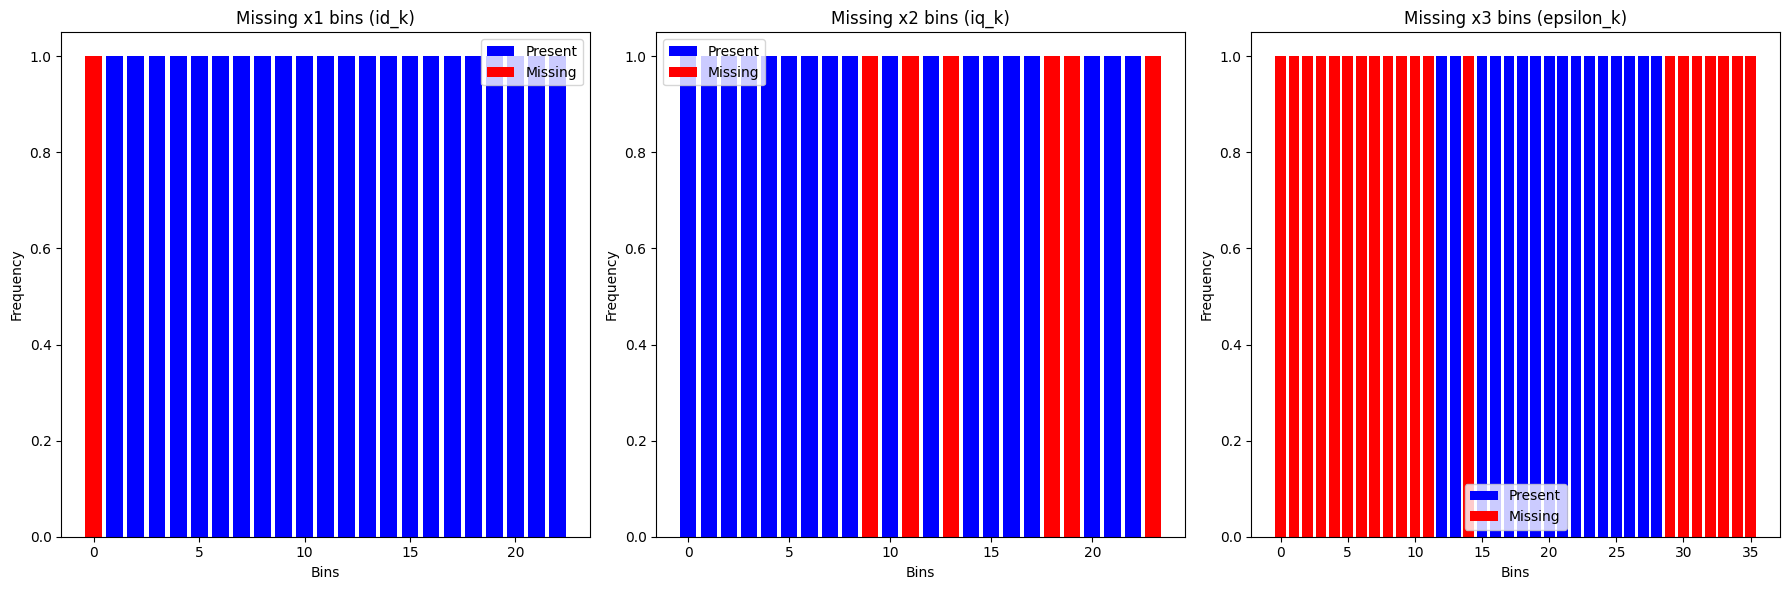

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges and step sizes for x1, x2, and x3
step_x1_x2 = 10          # Step size for x1 and x2 in Amps
step_x3 = np.pi / 18     # Step size for x3 in radians

# Generate the bins for each variable
x1_bins = np.arange(-240, 0, step_x1_x2)
x2_bins = np.arange(0, 241, step_x1_x2)
x3_bins = np.arange(-np.pi, np.pi + step_x3, step_x3)

# Function to assign each value to a bin index
def assign_bin(value, bins):
    return np.digitize(value, bins) - 1  # Shift to 0-based indexing

# Assuming sampled_data has the final sampled data from the previous steps
# Apply the binning function to x1, x2, and x3 columns for training and testing sets

train_data['class_id_k'] = train_data['id_k'].apply(lambda x: assign_bin(x, x1_bins))
train_data['class_iq_k'] = train_data['iq_k'].apply(lambda x: assign_bin(x, x2_bins))
train_data['class_epsilon_k'] = train_data['epsilon_k'].apply(lambda x: assign_bin(x, x3_bins))

test_data['class_id_k'] = test_data['id_k'].apply(lambda x: assign_bin(x, x1_bins))
test_data['class_iq_k'] = test_data['iq_k'].apply(lambda x: assign_bin(x, x2_bins))
test_data['class_epsilon_k'] = test_data['epsilon_k'].apply(lambda x: assign_bin(x, x3_bins))

# Function to calculate missing bins after sampling
def get_missing_bins(sampled_data, bins, column_name):
    # Find unique bin indices for the given column
    valid_bins = set(sampled_data[column_name].unique())
    all_bins = set(range(len(bins) - 1))  # All possible bins
    missing_bins = all_bins - valid_bins  # Missing bins
    return sorted(missing_bins)

# Get missing bins for each variable
missing_x1_bins = get_missing_bins(train_data, x1_bins, 'class_id_k')
missing_x2_bins = get_missing_bins(train_data, x2_bins, 'class_iq_k')
missing_x3_bins = get_missing_bins(train_data, x3_bins, 'class_epsilon_k')

# Visualizing the missing bins for each variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for id_k (x1 variable)
axes[0].bar(np.arange(len(x1_bins) - 1), np.ones(len(x1_bins) - 1), color='blue', label='Present')
axes[0].bar(missing_x1_bins, np.ones(len(missing_x1_bins)), color='red', label='Missing')
axes[0].set_title('Missing x1 bins (id_k)')
axes[0].set_xlabel('Bins')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot for iq_k (x2 variable)
axes[1].bar(np.arange(len(x2_bins) - 1), np.ones(len(x2_bins) - 1), color='blue', label='Present')
axes[1].bar(missing_x2_bins, np.ones(len(missing_x2_bins)), color='red', label='Missing')
axes[1].set_title('Missing x2 bins (iq_k)')
axes[1].set_xlabel('Bins')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Plot for epsilon_k (x3 variable)
axes[2].bar(np.arange(len(x3_bins) - 1), np.ones(len(x3_bins) - 1), color='blue', label='Present')
axes[2].bar(missing_x3_bins, np.ones(len(missing_x3_bins)), color='red', label='Missing')
axes[2].set_title('Missing x3 bins (epsilon_k)')
axes[2].set_xlabel('Bins')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()


In [40]:
# Save the plot to a specific location
save_path = '../Images/paper_img/eliminated.png'  # Change this path as needed
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
print("image saved at "+save_path)

image saved at ../Images/paper_img/eliminated.png


<Figure size 640x480 with 0 Axes>

In [41]:
import gc
torch.cuda.empty_cache()
gc.collect()


233